In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = '/home/kal/Documents/codeprojects/Unsupervised_Learning/data/weekly_smoothed_agg.csv'
df = pd.read_csv(DATA_PATH)
df = df.drop(['Unnamed: 0', 'loc_id'], axis=1)

df = df.round(5) 
df

,latitude,longitude,0,1,2,3,4,5,6,7,...,43,44,45,46,47,48,49,50,51,52
0,3.0,33.0,6.49627,5.38635,4.49128,4.19533,4.31119,4.39201,4.54070,5.83596,...,26.77083,25.65520,24.28021,21.86168,18.15368,15.08472,12.70791,9.91375,8.08213,8.75719
1,3.0,33.5,5.93635,5.00142,4.35111,4.12670,4.35792,4.34729,4.49210,5.64719,...,21.44246,20.62315,19.36737,17.50219,14.72997,12.44871,10.85762,8.56579,7.30954,7.77616
2,3.0,34.0,5.70514,4.82565,4.36924,4.15622,4.40665,4.37797,4.47595,5.37997,...,17.20554,16.91743,16.13393,14.85094,12.76980,11.01659,10.00988,7.93365,6.95294,7.06680
3,3.0,34.5,5.55232,4.65156,4.33723,4.04889,4.22062,4.24933,4.17075,4.78169,...,14.68533,15.05462,14.82676,13.97961,12.25254,10.67962,9.91097,7.83512,6.74176,6.74819
4,3.0,35.0,4.78572,4.02284,3.85838,3.52846,3.65751,3.68210,3.43761,3.89393,...,10.36384,11.22362,11.41076,11.18859,10.08972,8.87939,8.38078,6.66211,5.76362,5.80713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,15.0,46.0,0.14146,0.16554,0.26512,0.42503,0.97214,1.23902,1.11140,1.20073,...,0.38117,0.37964,0.32752,0.27745,0.22043,0.17633,0.14269,0.14516,0.13288,0.44676
771,15.0,46.5,0.10477,0.11864,0.22369,0.31521,0.82931,0.93590,0.78097,0.82533,...,0.40238,0.43553,0.35971,0.28107,0.21757,0.17109,0.13056,0.12462,0.10868,0.30776
772,15.0,47.0,0.20786,0.22615,0.32826,0.45821,1.04208,1.08210,0.91756,0.95481,...,0.92727,0.98564,0.82885,0.63041,0.49861,0.40291,0.30461,0.29105,0.25283,0.42267
773,15.0,47.5,0.35756,0.39726,0.52315,0.69260,1.43612,1.47636,1.31012,1.33684,...,1.20044,1.33298,1.13311,0.86721,0.69976,0.59458,0.46776,0.44926,0.41536,0.65943


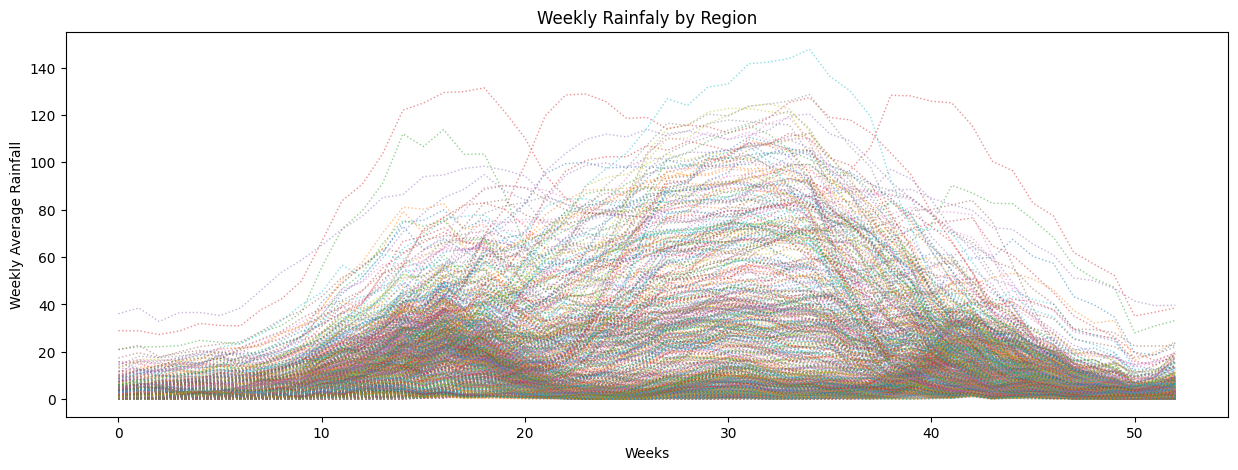

In [76]:
# Old with out smoothing 

fig = plt.figure(figsize=(15, 5))

for i in range(df.shape[0]):
    ypoints =  df.iloc[i,2:].values.flatten().tolist()
    plt.plot(ypoints, linestyle = 'dotted', linewidth=1, alpha=0.5)

plt.xlabel('Weeks')
plt.ylabel('Weekly Average Rainfall')
plt.title('Weekly Rainfaly by Region')
plt.show()       
        

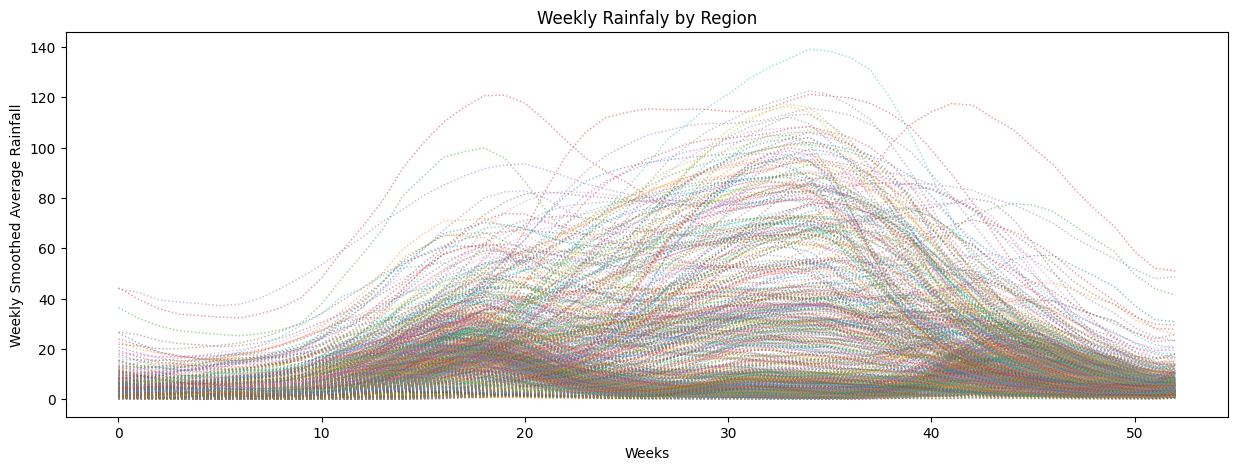

In [3]:
fig = plt.figure(figsize=(15, 5))

for i in range(df.shape[0]):
    ypoints =  df.iloc[i,2:].values.flatten().tolist()
    plt.plot(ypoints, linestyle = 'dotted', linewidth=1, alpha=0.5)

plt.xlabel('Weeks')
plt.ylabel('Weekly Smoothed Average Rainfall')
plt.title('Weekly Rainfaly by Region')
plt.show()    

In [4]:
data = df.iloc[:,2:].values
data.shape

(775, 53)

In [5]:
def shifted(data):
    # subtract each feature vector from its mean
    shifted_data = data - np.mean(data,axis=0) 
    return shifted_data

In [6]:
def calculate_cov(data):
    num_samples = data.shape[1] 
    cov = (data @ data.T)/num_samples
    return cov

In [7]:
shifted_data = shifted(data).T
cov = calculate_cov(shifted_data)

In [8]:
cov

array([[17.59065588, 16.08605083, 14.83750282, ..., 22.6486077 ,
        20.09954559, 19.95585812],
       [16.08605083, 14.99240626, 14.0458631 , ..., 20.06480507,
        18.07652642, 18.28193527],
       [14.83750282, 14.0458631 , 13.38887474, ..., 17.98567994,
        16.44266338, 16.89522726],
       ...,
       [22.6486077 , 20.06480507, 17.98567994, ..., 30.87228212,
        26.65147144, 25.76508106],
       [20.09954559, 18.07652642, 16.44266338, ..., 26.65147144,
        23.3322344 , 22.81638875],
       [19.95585812, 18.28193527, 16.89522726, ..., 25.76508106,
        22.81638875, 23.13837805]])

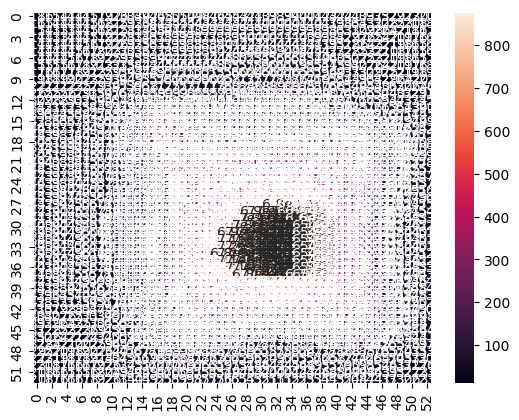

In [9]:
hm = sns.heatmap(data=cov, annot=True) 
plt.show()

In [10]:
def eigen(cov,features_names):
    eigen_values , eigen_vectors = np.linalg.eig(cov)
    # sort the eigenvectors and eigenvalues descending in terms of the eigenvalues
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_features = features_names[sorted_index]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    return sorted_eigenvalues,sorted_eigenvectors,sorted_features

In [11]:
features_names = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51',
       '52'])

In [12]:
eigenvalues, eigenvectors, sorted_features = eigen(cov,features_names)
print(f"Sorted Features: {sorted_features}")
print(f"eigenvalues: {eigenvalues}")
print(f"eigenvectors:\n{eigenvectors}")

Sorted Features: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '41' '43' '44' '46' '50' '52' '51'
 '49' '48' '47' '45' '42' '40' '39' '38' '37']
eigenvalues: [1.23513947e+04 1.93906295e+03 3.59725344e+02 9.64478110e+01
 9.10565084e+01 7.66978920e+01 2.07070597e+01 1.29032878e+01
 5.60756591e+00 4.01675670e+00 1.63874966e+00 1.30822559e+00
 4.43348552e-01 3.80742583e-01 3.18083362e-01 2.10635776e-01
 1.75643049e-01 1.66822701e-01 1.15464249e-01 7.23879363e-02
 6.35099440e-02 5.68901682e-02 4.66150863e-02 4.28895388e-02
 3.96343032e-02 3.44372310e-02 2.86894181e-02 2.68697976e-02
 2.52848872e-02 2.32152141e-02 1.94729526e-02 1.72601260e-02
 1.53640923e-02 1.38683043e-02 1.33080151e-02 1.14451536e-02
 1.04928846e-02 8.49035207e-03 7.80422521e-03 7.33385731e-03
 6.76855620e-03 5.90046690e-03 5.63282741e-03 5.48976090e-03
 4.67439947e-03 4.33948716e-03 4.134156

In [13]:
def pca(data,k,eigenvectors):
    top_eigenvectors = eigenvectors[:,:k]
    F = np.dot(top_eigenvectors.T,data)
    return F, top_eigenvectors

In [14]:
def calculate_error(F,top_eigenvectors,data):
    
    F_inverse = np.dot(top_eigenvectors,F) + np.mean(data,axis=0).reshape(-1,1)
    
    error = np.mean((data.T-F_inverse)**2)
    
    return error,F_inverse.T

In [15]:
for k in range(53,0,-1):
    data_reduced, top_eigenvectors = pca(shifted_data,k,eigenvectors)
    error, inverse = calculate_error(data_reduced,top_eigenvectors,data)
    print(f"{k} number of components Error: {error:0.2f}")

53 number of components Error: 0.00
52 number of components Error: 0.00
51 number of components Error: 0.00
50 number of components Error: 0.00
49 number of components Error: 0.00
48 number of components Error: 0.00
47 number of components Error: 0.00
46 number of components Error: 0.00
45 number of components Error: 0.00
44 number of components Error: 0.00
43 number of components Error: 0.00
42 number of components Error: 0.00
41 number of components Error: 0.00
40 number of components Error: 0.00
39 number of components Error: 0.00
38 number of components Error: 0.00
37 number of components Error: 0.00
36 number of components Error: 0.00
35 number of components Error: 0.00
34 number of components Error: 0.00
33 number of components Error: 0.00
32 number of components Error: 0.00
31 number of components Error: 0.00
30 number of components Error: 0.00
29 number of components Error: 0.00
28 number of components Error: 0.00
27 number of components Error: 0.00
26 number of components Erro

In [16]:
k = 6
data_reduced, top_eigenvectors = pca(shifted_data,k,eigenvectors)
error, inverse = calculate_error(data_reduced,top_eigenvectors,data)
print(f"{k} number of components Error: {error:0.2f}")

6 number of components Error: 0.92


In [17]:
dataframe = pd.DataFrame.from_records(data_reduced.T)

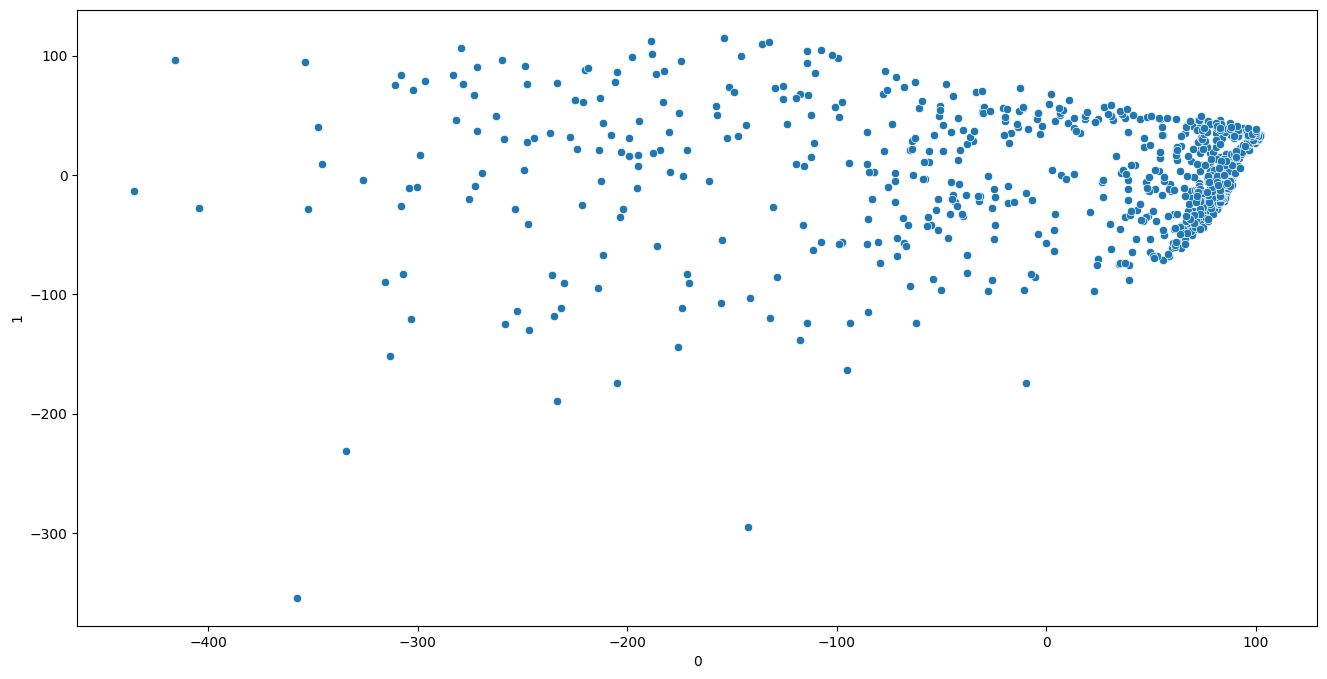

In [128]:
# Old without smoothing 

fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=dataframe, x=dataframe[0], y=dataframe[1], ax=ax)
plt.show()

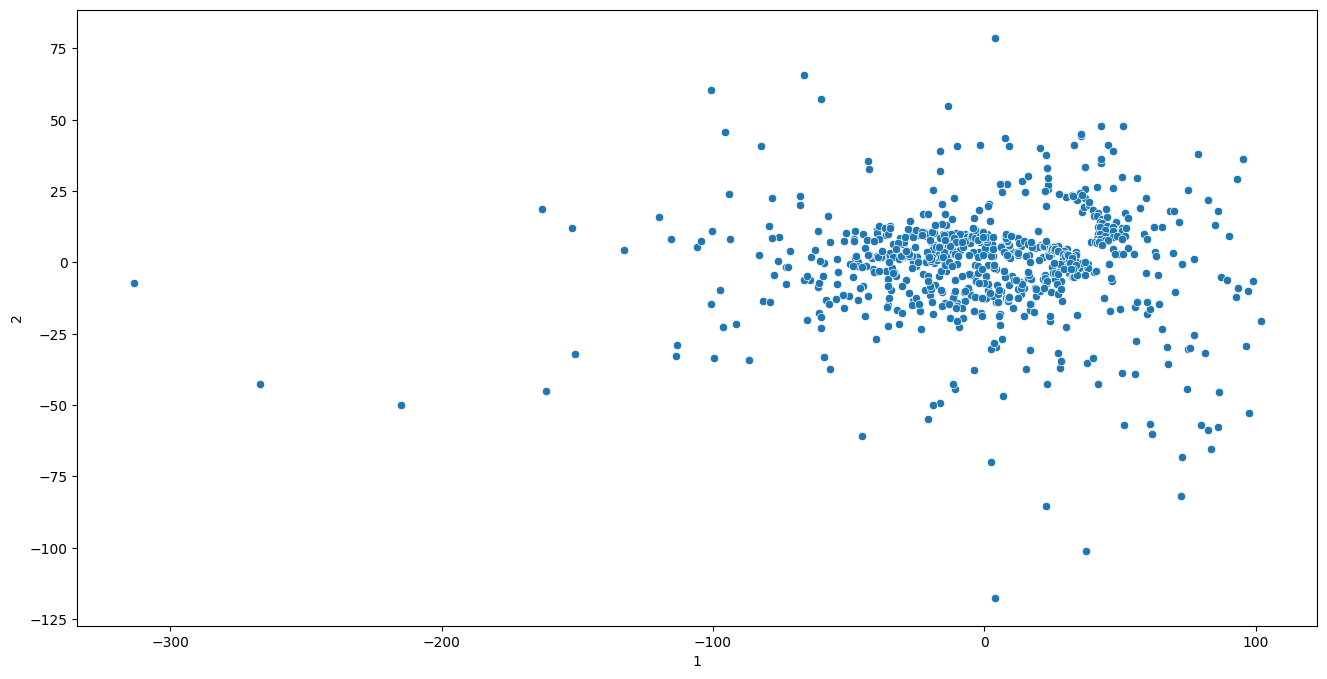

In [21]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=dataframe, x=dataframe[1], y=dataframe[2], ax=ax)
plt.show()

In [26]:
def euclidean_distance(point1, point2):

    return np.sqrt(np.sum((point1 - point2) ** 2))

In [27]:
def range_query(data, point, epsilon):

    neighbors = []
    for i, data_point in enumerate(data):
        if euclidean_distance(point, data_point) <= epsilon:
            neighbors.append(i)
    return neighbors

In [28]:
def expand_cluster(data, labels, current_point, neighbors, cluster_id, epsilon, min_points):
    labels[current_point] = cluster_id
    queue = neighbors.copy()

    while queue:
        current_neighbor = queue.pop(0)

        if labels[current_neighbor] == -1:
            labels[current_neighbor] = cluster_id
            new_neighbors = range_query(data, data[current_neighbor], epsilon)
            if len(new_neighbors) >= min_points:
                queue.extend(new_neighbors)

        elif labels[current_neighbor] == 0:
            labels[current_neighbor] = cluster_id

In [29]:
def dbscan(data, epsilon, min_points):

    labels = np.full(len(data), -1, dtype=int)

    cluster_id = 0

    for i in range(len(data)):

        if labels[i] != -1:
            continue

        # Find neighbors of the current point
        neighbors = range_query(data, data[i], epsilon)

        # If the number of neighbors is less than min_points, mark the point as noise
        if len(neighbors) < min_points:
            labels[i] = -1  # Noise point
        else:
            # Expand the cluster starting from the current point
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, epsilon, min_points)

    return labels

In [30]:
from sklearn.neighbors import NearestNeighbors

from matplotlib import pyplot as plt
 
neighbors = NearestNeighbors(n_neighbors = 8)
neighbors_fit = neighbors.fit(data_reduced.T)
distances, indices = neighbors_fit.kneighbors(data_reduced.T)

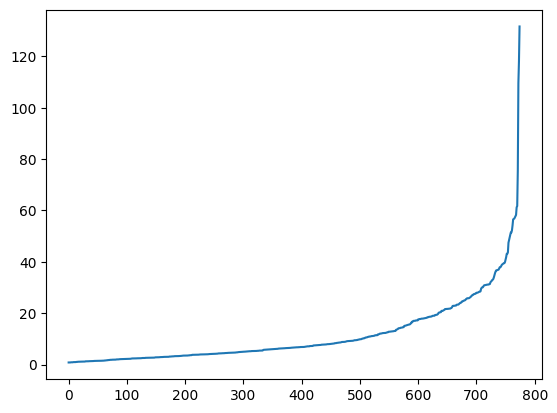

In [31]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [32]:
eps_values = np.arange(10,50, 5)
minPts_values = np.arange(4,12)
len(eps_values), len(minPts_values)

(8, 8)

In [33]:
from itertools import product
params = list(product(eps_values, minPts_values))

In [34]:
from sklearn.metrics import silhouette_score
sil_score = []
for p in params:
    cluster_labels = dbscan(data_reduced.T, p[0], p[1])
    if len(set(cluster_labels)) > 1:
        sil_score.append(silhouette_score(data_reduced.T, cluster_labels))
    else:
        sil_score.append(np.nan)

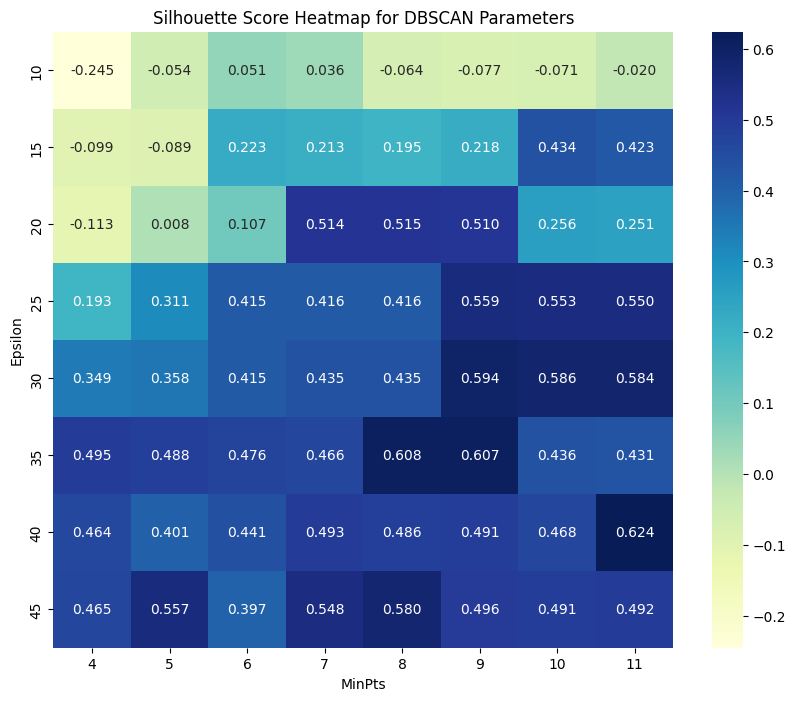

In [35]:
# Create a DataFrame to store the results
df = pd.DataFrame({'Epsilon': [p[0] for p in params],
                   'MinPts': [p[1] for p in params],
                   'Silhouette Score': sil_score})

# Create a pivot table for the heatmap
pivot_df = df.pivot(index='Epsilon', columns='MinPts', values='Silhouette Score')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Silhouette Score Heatmap for DBSCAN Parameters')
plt.show()

In [37]:
cluster_labels = dbscan(data_reduced.T, 30,4)
list(set(cluster_labels))

[1, 2, 3, 4, 5, 6, 7, -1]

In [38]:
for num in np.unique(cluster_labels):
    print(f"Cluster {num}: {sum(cluster_labels==num)}")

Cluster -1: 119
Cluster 1: 621
Cluster 2: 7
Cluster 3: 4
Cluster 4: 4
Cluster 5: 5
Cluster 6: 6
Cluster 7: 9


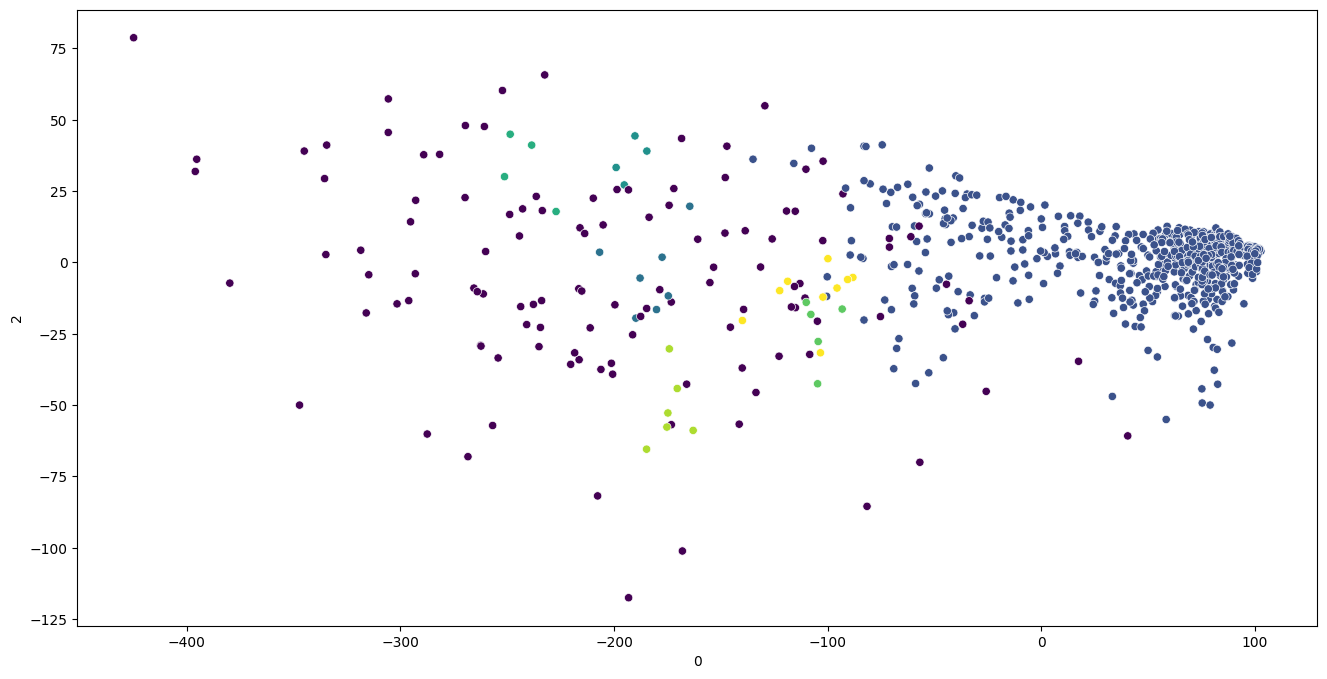

In [45]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data=dataframe, x=dataframe[0], y=dataframe[2], c=cluster_labels.astype(float), ax=ax)
plt.show()

In [41]:
dataframe[1]

0     -36.336882
1     -28.777968
2     -19.938954
3     -14.570742
4      -7.570464
         ...    
770    29.220625
771    31.663112
772    33.748029
773    32.671301
774    32.111861
Name: 1, Length: 775, dtype: float64

In [54]:
dataframe.iloc[0].values.flatten().tolist()

[-57.30404182401564,
 -36.33688220011302,
 -2.993315201833945,
 -6.736713171749528,
 -5.863300681613138,
 -7.421319821255841]

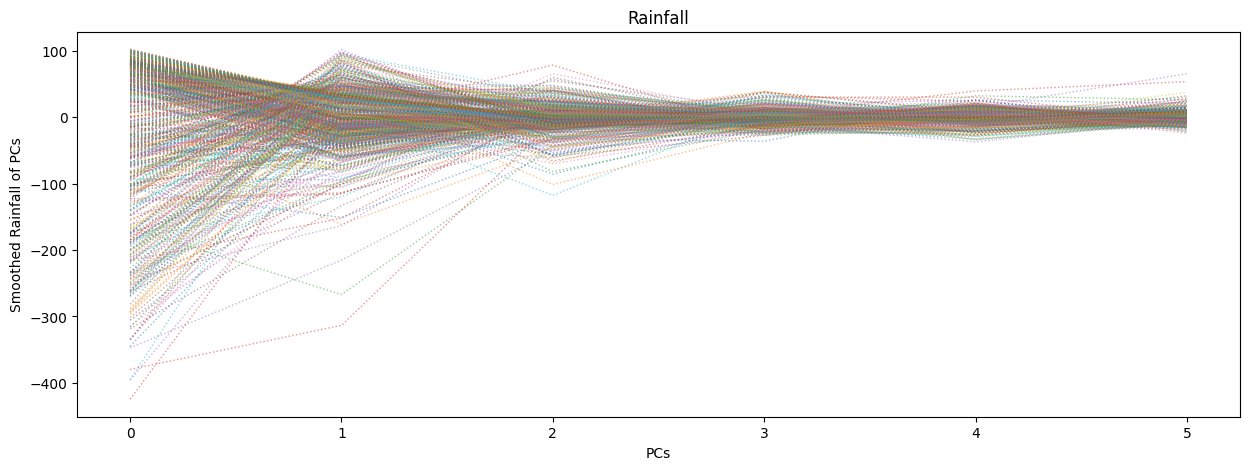

In [56]:
fig = plt.figure(figsize=(15, 5))

for i in range(dataframe.shape[0]):
    ypoints =  dataframe.iloc[i].values.flatten().tolist()
    plt.plot(ypoints, linestyle = 'dotted', linewidth=1, alpha=0.5)

plt.xlabel('PCs')
plt.ylabel('Smoothed Rainfall of PCs')
plt.title('Rainfall')
plt.show()   